In [1]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow



In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 146MB/s]


In [3]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [41]:
!wget 'http://images.cocodataset.org/val2017/000000039785.jpg'

--2024-12-21 21:44:46--  http://images.cocodataset.org/val2017/000000039785.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.194.129, 16.182.71.89, 52.217.173.129, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.194.129|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136076 (133K) [image/jpeg]
Saving to: ‘000000039785.jpg’

000000039785.jpg    100%[===================>] 132.89K   204KB/s    in 0.7s    

2024-12-21 21:44:47 (204 KB/s) - ‘000000039785.jpg’ saved [136076/136076]



In [42]:
ig = Image.open('000000039785.jpg')

In [43]:
transform = T.ToTensor()
img = transform(ig)

In [44]:
with torch.no_grad():
  prediction = model([img])

In [45]:
prediction[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [46]:
bboxes, labels, scores = prediction[0]['boxes'], prediction[0]['labels'], prediction[0]['scores']

In [47]:
num = torch.argwhere(scores>0.7).shape[0]

In [48]:
num

5

In [49]:

coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [50]:
bboxes

tensor([[202.5573, 174.4676, 273.0295, 260.2536],
        [394.6773, 124.3111, 431.6332, 144.8904],
        [165.8009, 142.5593, 221.6567, 156.7342],
        [410.2421, 138.4516, 416.7281, 152.5971],
        [408.6368, 118.5139, 427.2208, 152.7812],
        [408.1202, 133.3087, 417.3239, 153.3659],
        [410.6100, 117.2048, 416.4962, 126.7415],
        [410.6529, 117.0746, 425.0462, 134.1706],
        [418.2917, 123.8579, 425.4875, 131.7482],
        [415.2455, 119.7351, 428.5410, 132.5931],
        [227.2535, 241.2772, 255.0335, 261.4568],
        [415.2804, 122.4325, 425.1227, 130.4857],
        [208.2228, 143.3864, 222.1297, 153.0415],
        [ 88.8372,  45.5031, 106.5663,  64.3701],
        [  0.0000,  44.9955, 155.1829, 160.2111],
        [410.2335, 117.4758, 420.2594, 129.3439],
        [166.0882, 141.5681, 223.8512, 148.9333],
        [210.2752, 144.5090, 218.2596, 152.8244],
        [166.2979, 146.1423, 180.7345, 155.6854],
        [476.3200,  63.6576, 489.8751,  87.8637],


In [51]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [54]:
igg = cv2.imread('000000039785.jpg')
for i in range(num):
  x1,y1,x2,y2 = bboxes[i].numpy().astype("int")
  class_name = coco_names[labels.numpy()[i]-1]
  igg = cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),2)
  igg = cv2.putText(igg,class_name,(x1,y1 - 10), font, 0.5, (255,0,0), 2, cv2.LINE_AA)


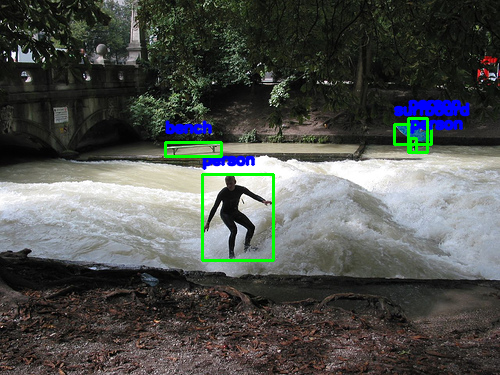

In [55]:
cv2_imshow(igg)